# Chapter 2: Distributions

---

## 2.1 Histograms

Histograms is a way of visualizing data in distribution form that measures variable frequency (how many times a value appear in the data)

A way of counting frequency of values in a given seqeunce is:

In [1]:
cars = ['Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG',
        'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG',
        'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG',
        'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG', 'Ford', 'BMW', 'MG', 'Fiat']


# Here we make a dict to store frequencies
# First time the value appear it returns 0+1 and store it by the variable name in the dict
# After that, it adds one to the existing variable's value in the dict every times it sees the variable

count = {}
for car in cars:
	count[car] = count.get(car, 0)+1

print(count)

{'Ford': 12, 'BMW': 12, 'MG': 12, 'Fiat': 1}


Another way is to use a built-in Counter in Python

In [2]:
from collections import Counter

count = Counter(cars)           # easy peasy lemon squeezy
count                           # The result is a Counter object, which is a subclass of dictionary.

Counter({'Ford': 12, 'BMW': 12, 'MG': 12, 'Fiat': 1})

Or we can just use the pandas value_counts() from previous chapter

---

## 2.2 Representing Histograms

In [7]:
# Author-defined Hist class for representing histograms
import thinkstats2

hist = thinkstats2.Hist(cars)
print(hist)
print("Ford repeated:", hist.Freq('Ford'), "Times")        # Author-defined functions to calculate frequency of specific value

Hist({'Ford': 12, 'BMW': 12, 'MG': 12, 'Fiat': 1})
Ford repeated: 12 Times


Printing variables sorted

In [9]:
for val in sorted(hist.Values()):
    print(f"{val} is repeated:", f"{hist.Freq(val)} Times")

BMW is repeated: 12 Times
Fiat is repeated: 1 Times
Ford is repeated: 12 Times
MG is repeated: 12 Times


---

## 2.3 Plotting Histograms

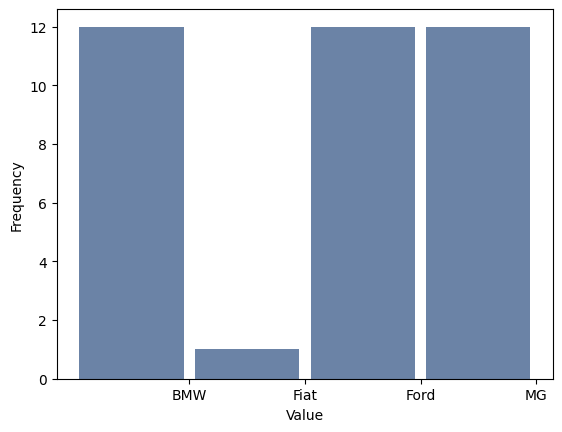

<Figure size 800x600 with 0 Axes>

In [12]:
# Also author-defined module for plotting laying on pyplot from matplotlib
import thinkplot

thinkplot.Hist(hist)
thinkplot.show(xlabel='Value', ylabel='Frequency')

---

## 2.4 NSFG Variables

A good way to explore your data and get familiar with your dataset is to plot a histo of them

In [30]:
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

c:\Users\elkfrawy\Desktop\Books Notes\Think-STATS-2\RequiredMaterial\nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
c:\Users\elkfrawy\Desktop\Books Notes\Think-STATS-2\RequiredMaterial\nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

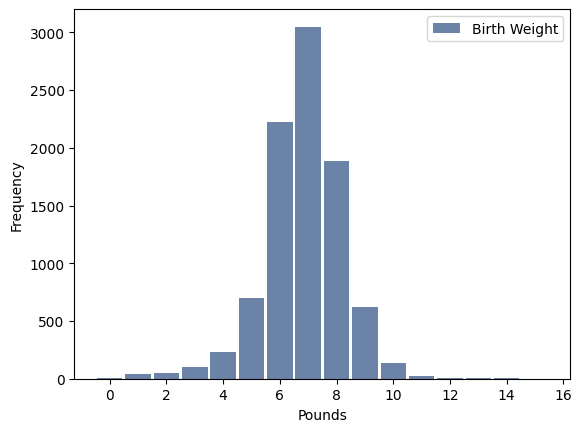

<Figure size 800x600 with 0 Axes>

In [39]:
# Plot
hist = thinkstats2.Hist(live.birthwgt_lb, label='Birth Weight')
thinkplot.Hist(hist)
thinkplot.show(xlabel='Pounds', ylabel='Frequency')

We may notice here that the left side has longer tail than the right side which indicates this as (Gaussian distribution) and not normal distribution and also tells us that **early babies are common, but pregnancies seldom go past 43 weeks, and doctors often intervene if they do.**

---

## 2.5 Outliers

**Outliers** are extreme values that might be errors in measurement and recording, or might be ac- curate reports of rare events.

In [43]:
# Author-defined features
hist = thinkstats2.Hist(live['prglngth'], label='Pregnancy Length')

for weeks, freq in hist.Smallest(10):
    print(weeks, freq)                  # return the n (e.g. 10) smallest values from the histogram

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


- Values below 10 weeks are certainly errors; the most likely explanation is that the outcome was not coded correctly. 
- Values Between 10 and 30 weeks, it is hard to be sure; some values are probably errors, but some represent premature babies.
- Values higher than 30 weeks are probably normal

On the other hand

In [44]:
# Author-defined features

for weeks, freq in hist.Largest(10):
    print(weeks, freq)                  # return the n (e.g. 10) largest values from the histogram

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


Since our motivating question is whether first babies tend to be early (or late) so we may interest only on babies after 27 weeks

---

## 2.6 First Babies

Our interest is on first babies so we need to seperate them from others

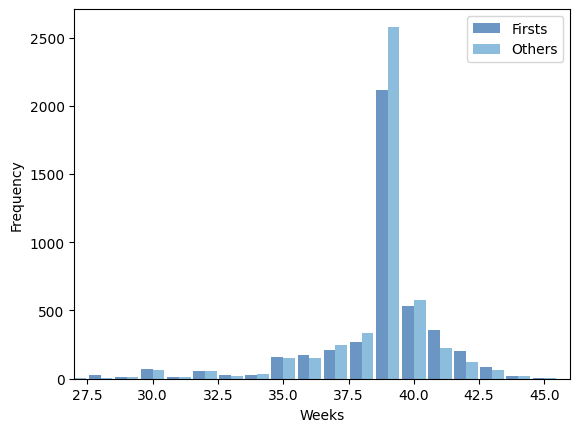

<Figure size 800x600 with 0 Axes>

In [51]:
# Using birthord variable to split

firsts = live[live['birthord'] == 1]
others = live[live['birthord'] != 1]

first_hist = thinkstats2.Hist(firsts['prglngth'], label='Firsts')
others_hist = thinkstats2.Hist(others['prglngth'], label='Others')

# Then plotting them
width = 0.45
thinkplot.PrePlot(2)        # Preparing for two plots
thinkplot.Hist(first_hist, align='right', width=width)              # Adjusting align
thinkplot.Hist(others_hist, align='left' , width=width)             # Adjusting align
thinkplot.Show(xlabel='Weeks', ylabel='Frequency', xlim=[27, 46])

Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer 'first babies" than 'others'

So some of the apparent differences in the histograms are due to sample sizes. In the
next chapter we address this problem using **probability mass functions**.

---

## 2.7 Summarizing Distributions

A histogram is a complete description of the distribution of a sample

If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.

- central tendency: Do the values tend to cluster around a particular point?

- modes: Is there more than one cluster?

- spread: How much variability is there in the values?

- tails: How quickly do the probabilities drop off as we move away from the modes?

- outliers: Are there extreme values far from the modes?

Most of these answers (called **summary statistics**) can be answered with calculatin the **mean** (For now) Which describes the **central tendency** of the distribution

**Mean is the sum of all values (sum(Xi) where i from 0 to n-1) divided by their number (n)**

*Notice that mean can lead to misleading information if you did not investigate the data you are working with first*

---

## 2.8 Variance

Variance is a summary statistic intended to describe the variability or spread of a distribution.

In [53]:
# Pandas do provide methods for calculating these measurments

mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print('Mean is:', mean)
print('Variance is:', var)
print('standard deviation is:', std)

Mean is: 38.56055968517709
Variance is: 7.302662067826817
standard deviation is: 2.702343810070587


This means that we should be expecting deviations of 2-3 weeks from mean

---

## 2.9 Effect Size 

An effect size is a summary statistic intended to describe the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

Or we can calculate cohen's d which is a way to convey the size of the effect is to compare the difference
between groups to the variability within groups.

In [54]:
# Calculating cohen's d
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

---

## 2.10 Reporting Results

The answer depends on who is asking the question. A statistician should have the ability to deliver the right answer for the right question so you have to analyze the question and know amount of detail of even the whole answer you will be giving

How you report results also depends on your goals. if the effect you are introducing does really need to be highlighted do it and choose visualizations that support the importance your are talking about and same logic with choosing the right summary statistics that support your idea

---

## Conclusion

Chapter 2 of Think Stats 2 introduced the concept of distributions and their role in understanding how data is spread across different values. It covered basic tools like histograms and summary statistics to describe the structure of datasets. These concepts provide a foundation for analyzing data effectively and preparing for more advanced statistical techniques.